Sources:
    
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

http://scikit-learn.org/stable/modules/tree.html

https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

http://scikit-learn.org/stable/modules/neighbors.html

http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

# Decision Trees 

Tutorial plan:

[1. Creating Data for Classification](#1.-Creating-Data-for-Classification)

[2. Creating a Decision Tree Classifier](#2.-Creating-a-Decision-Tree-Classifier)

[3. Interpreting the Results](#3.-Interpreting-the-Results)

[4. Oh, how I wish life was that easy](#4.-Oh,-how-I-wish-life-was-that-easy)

[5. Model Training vs Model Testing](#5.-Model-Training-vs-Model-Testing)

[6. Using Decision-Trees with the Fragile Families data](#6.-Using-Decision-Trees-with-the-Fragile-Families-data)


Things to keep in mind:

**Decision Trees**

* Decision trees are used for **classification** - that is, they sort input into separate buckets (assign the input to categorical variables). Today, we will use decision trees to predict one of 13 possible GPA values (values from 1.0 to 4.0 which lie 0.25 apart). We will treat these GPA values as completely distinct values, ignoring that they are consecutive, because that is what decision trees require.


* We will use three input variables for decision trees. These input variables (or **predictors**) do not need to be discrete.

In [1]:
# import libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys, os
from sklearn.metrics import accuracy_score
import sys

# 1. Creating Data for Classification

To start, let's create some fake data that we will then use to understand decision trees. We will create a DataFrame with 3 columns: 2 columns (labels: x1,x2) will be continuos variables between 0 and 1 and the third column (label: y) will be a binary variable.

The binary variable will be 1 if x1 is less than 0.5 and x2 is more than 0.7 and 0 otherwise.

Because machine learning models such as decision trees work best with large amounts of data, we will make our DataFrame have 10,000 rows.

In [2]:
# First, we use the rand function in numpy to create 2 columns of 10,000 rows each with numbers between 0 and 1
x = np.random.rand(10000,2)
# Now, we set up the value of y based on our rule
y = []
for x1,x2 in x:
    if (x1<0.5) and (x2>0.7):
        y.append(1)
    else:
        y.append(0)
            
# We now create a DataFrame with columns x1 x2 and y
df = pd.DataFrame()
df["x1"] = x[:,0]
df["x2"] = x[:,1]
df["y"] = y
df.head()

,x1,x2,y
0,0.079885,0.091438,0
1,0.568697,0.150489,0
2,0.157270,0.029960,0
3,0.190329,0.272148,0
4,0.122317,0.088877,0


Now that we have the DataFrame. Let's visualize the data in a scatter plot where the x-axis is x1, the y-axis is x2 and the color of the data point is given by the value of y.

Text(0,0.5,'x2')

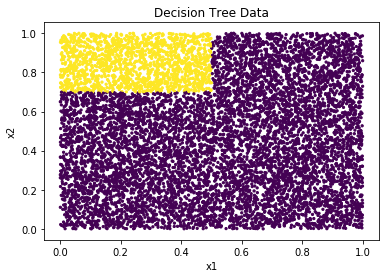

In [3]:
plt.scatter(df["x1"],df["x2"],c=df["y"],s=5)
plt.title('Decision Tree Data')
plt.xlabel("x1")
plt.ylabel("x2")

# 2. Creating a Decision Tree Classifier

Looking at the scatter plot we see that, as expected, y=1 almost only when x1<0.5 and x2>0.7.

Now, assume we don't know the rule used to generate the data. How can we learn the relationship between the variables and the outcome? 

We can use a decision tree to build a classifier model and find under what conditions of the variables x1 and x2 the outcome y is zero and under what conditions y is one.

To build the decision tree model, we use the sklearn library.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

We will train the decision tree using all of the data (10,000 rows).

Before we do that, we load libraries and define two functions that we will use to visualize the decision tree

In [5]:
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

from sklearn import tree
from IPython.display import Image
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM

def show_tree(treeGraph, out_file, features=None, classes=None):
    export_graphviz(clf_changed, out_file, feature_names=features, class_names=classes, filled=True)
    with open(out_file) as f:
        dot_graph = f.read()
    graph = graphviz.Source(dot_graph)
    return graph

def save_tree(treeGraph, out_file, features=None, classes=None):
    dot_data = tree.export_graphviz(treeGraph, out_file=None, feature_names=features, class_names=classes, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_svg("tree.svg")
    # convert svg to png
    drawing = svg2rlg("tree.svg")
    renderPM.drawToFile(drawing, out_file)

Now, we can define and train the decision tree classifier:

In [6]:
# Define decision tree classifier object
clf = DecisionTreeClassifier()
# Train decision tree using data. The first argument is the predictors and the second argument is the outcome
clf.fit(df[["x1","x2"]], df["y"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

We can now visualize the decision tree with our previously defined functions:

Can't handle color: transparent


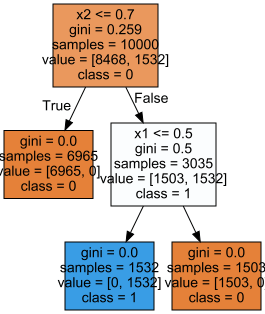

In [7]:
# Save and display generated tree 
our_features = ['x1','x2']
our_classes = ['0','1']
our_filename = "mytree.png"
save_tree(clf, out_file = our_filename, features = our_features, classes = our_classes)
i = Image(filename = our_filename)
i

# 3. Interpreting the Results

Looking at the tree, we see that the first split of the tree is based on whether x2 is less or equal to 0.7. If this is true, then the decision tree outputs y=0. But if it false, then there is a second split based on whether x1 is less or equal to 0.5. If true, the decision tree outputs y=1 and if false it outputs y=0.

So as we can see, the decision tree recovers a rule that is almost equal to the one we used to create the data!
(The difference is that the real rule is less than and not less than or equal to)

Let's look at the results in more detail:

Each intermediate node (box) of the tree contains four values:

1) Rule that's followed for "child" nodes, such as "science <= 2.5".

2) The gini coefficient

3) The number of samples from each category in the training set that fell into this node

4) The class assigned at this intermediate point

Note that the final nodes (leaves) do not have 1) because they don't have any children.

# 4. Oh, how I wish life was that easy

So far, decision trees appear to be this fantastic way to understand the relationship between variables and outcomes.
However, decision trees can be deceiving. Take for example the same data we had before, except that this time the outcome is wrong 1% of the times.

Text(0,0.5,'x2')

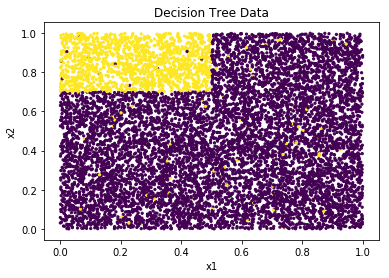

In [26]:
# First, we use the rand function in numpy to create 2 columns of 10,000 rows each with numbers between 0 and 1
x = np.random.rand(10000,2)
# Now, we set up the value of y based on our rule
y = []
for x1,x2 in x:
    if (x1<0.5) and (x2>0.7):
        # To make it more interesting, we add some noise into the data
        # and let the y value be wrong 1% of the times
        if np.random.rand(1) > 0.01:
            y.append(1)
        else:
            y.append(0)
    else:
        if np.random.rand(1) > 0.01:
            y.append(0)
        else:
            y.append(1)
            
# We now create a DataFrame with columns x1 x2 and y
df = pd.DataFrame()
df["x1"] = x[:,0]
df["x2"] = x[:,1]
df["y"] = y

# Plot the data as before
plt.scatter(df["x1"],df["x2"],c=df["y"],s=5)
plt.title('Decision Tree Data')
plt.xlabel("x1")
plt.ylabel("x2")

The data looks very similar to the previous data, but notice that there are some yellow dots in the purple region and some purple dots in the yellow region. Let's build a decision-tree and see if we can recover the rule that explains 99% of the data.

Can't handle color: transparent


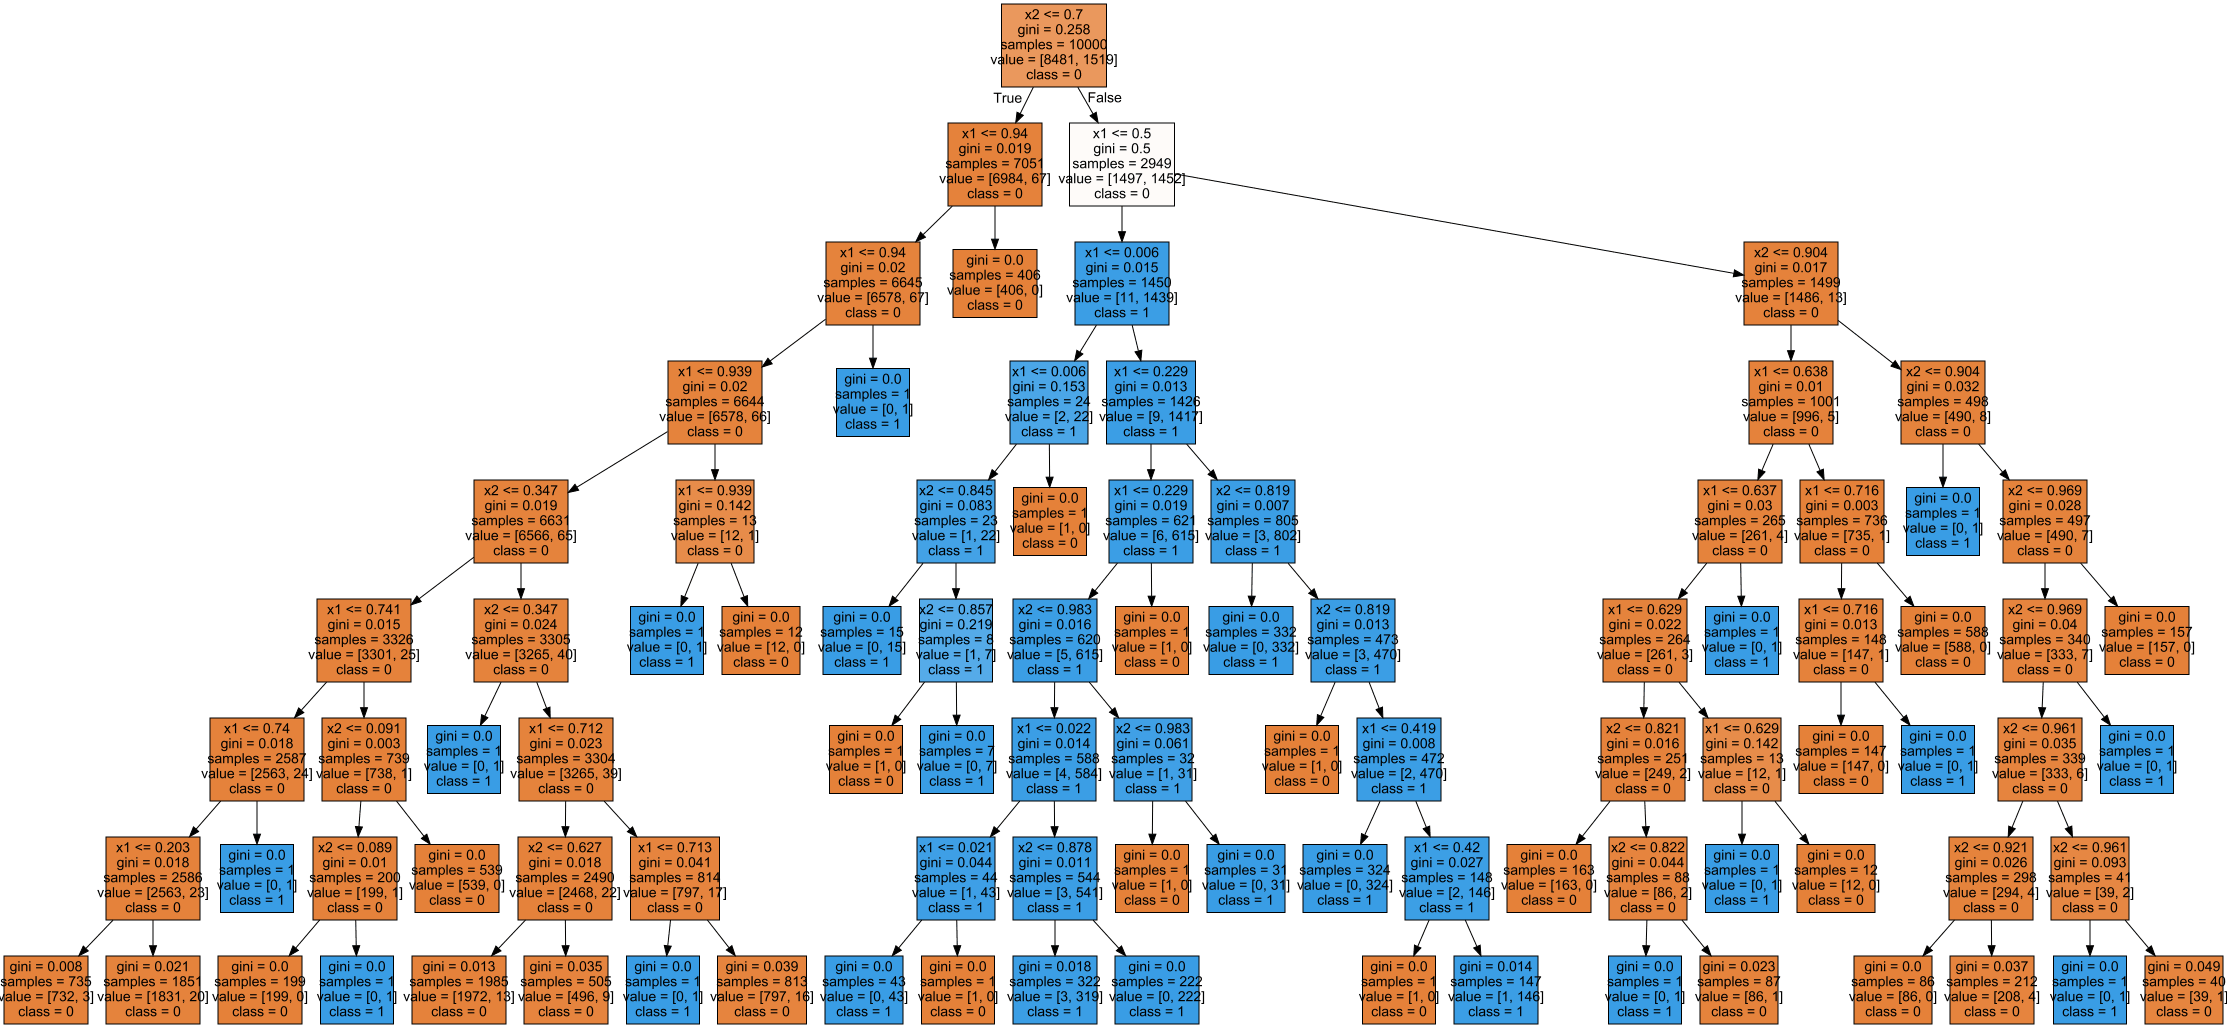

In [34]:
# Define decision tree classifier object
clf8 = DecisionTreeClassifier(max_depth=8)
# The max_depth argument limits the number of levels in the tree.

# Train decision tree using data. The first argument is the predictors and the second argument is the outcome
clf8.fit(df[["x1","x2"]], df["y"])

# Save and display generated tree 
our_features = ['x1','x2']
our_classes = ['0','1']
our_filename = "mytree.png"
save_tree(clf8, out_file = our_filename, features = our_features, classes = our_classes)
i = Image(filename = our_filename)
i

The resulting tree is way more complicated than the rule used to generate most of the data! What is going on?
 
This is an example of overffiting. The decision-tree ends up being very complicated because it is trying to fit every single data point rather than trying to figure out if there is a simple rule that fits most of the data. 
 
Is there anything we can do about this? Well, yes. If we pay attention to the tree above, we can see that the first and second levels contain the rule that generated the data, while the rest of the levels is trying to fit the remaining 1%.
 
To improve on the decision-tree, we could restrict the number of levels to 2. Let's see what happens then:

Can't handle color: transparent


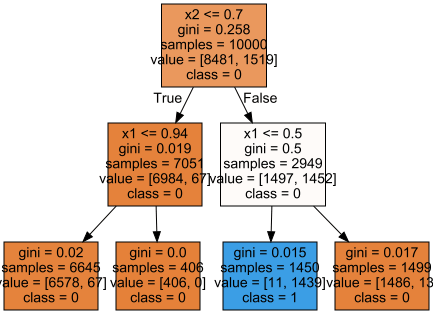

In [35]:
# Define decision tree classifier object
clf2 = DecisionTreeClassifier(max_depth=2)
# The max_depth argument limits the number of levels in the tree.

# Train decision tree using data. The first argument is the predictors and the second argument is the outcome
clf2.fit(df[["x1","x2"]], df["y"])

# Save and display generated tree 
our_features = ['x1','x2']
our_classes = ['0','1']
our_filename = "mytree.png"
save_tree(clf2, out_file = our_filename, features = our_features, classes = our_classes)
i = Image(filename = our_filename)
i

The rules that emerge from the decision-tree look much closer to the rules used to generate 99% of the data. 

But wait, didn't we cheat? didn't we use knowledge about the true rule in order to set max_depth=2?

What if we have no idea about the rule that generates the data? What can we do then?

# 5. Model Training vs Model Testing

The answer to the above questions is that we need to test our classifier models against new data and see how well they predict the new data. So in the case above, if we were to give the decision-tree with 8 levels (clf8) new data, it might yield poor predictions because it is overfitting the data we used to train it. But if we were to give the decision-tree with only 2 levels (clf2) new data, then we would expect its predictions to be fairly accurate.

Let's test this out!

First, we will create a new dataset in the same way as before to test the two models with. Note that the data is not going to be the same because we are using randomly generated points.

Text(0,0.5,'x2')

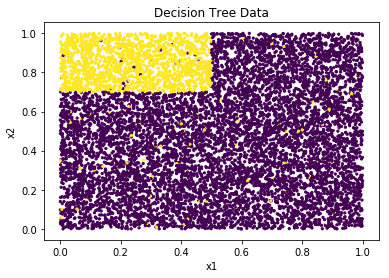

In [36]:
# First, we use the rand function in numpy to create 2 columns of 10,000 rows each with numbers between 0 and 1
x = np.random.rand(10000,2)
# Now, we set up the value of y based on our rule
y = []
for x1,x2 in x:
    if (x1<0.5) and (x2>0.7):
        # To make it more interesting, we add some noise into the data
        # and let the y value be wrong 1% of the times
        if np.random.rand(1) > 0.01:
            y.append(1)
        else:
            y.append(0)
    else:
        if np.random.rand(1) > 0.01:
            y.append(0)
        else:
            y.append(1)
            
# We now create a DataFrame with columns x1 x2 and y
df_test = pd.DataFrame()
df_test["x1"] = x[:,0]
df_test["x2"] = x[:,1]
df_test["y"] = y

# Plot the data as before
plt.scatter(df_test["x1"],df_test["x2"],c=df_test["y"],s=5)
plt.title('Decision Tree Data')
plt.xlabel("x1")
plt.ylabel("x2")

Now, we test the accuracy of the models on the dataset that was used to train them and the dataset that we want to test them with.

In [37]:
print("Accuracy of Decision Tree with 8 levels (clf8):\n")
# What is the accuracy on the training set? 
train_pred = clf8.predict(df[["x1","x2"]])
train_acc = sum(train_pred==df["y"].values)/train_pred.shape[0]
print("Training accuracy is", train_acc)

# What is the accuracy on the test set? 
test_pred = clf8.predict(df_test[["x1","x2"]])
test_acc = sum(test_pred==df_test["y"].values)/test_pred.shape[0]
print("Training accuracy is", test_acc)

print("\nAccuracy of Decision Tree with 2 levels (clf2):\n")
# What is the accuracy on the training set? 
train_pred = clf2.predict(df[["x1","x2"]])
train_acc = sum(train_pred==df["y"].values)/train_pred.shape[0]
print("Training accuracy is", train_acc)

# What is the accuracy on the test set? 
test_pred = clf2.predict(df_test[["x1","x2"]])
test_acc = sum(test_pred==df_test["y"].values)/test_pred.shape[0]
print("Training accuracy is", test_acc)

Accuracy of Decision Tree with 8 levels (clf8):

Training accuracy is 0.9929
Training accuracy is 0.9876

Accuracy of Decision Tree with 2 levels (clf2):

Training accuracy is 0.9909
Training accuracy is 0.9897


We see that clf5 does a better job than clf2 at predicting the outcomes for the training data. This is expected because clf5 is overfitting the training data so it is very good at explaining that data.

However, clf5 is worse than clf2 at predicting the outcomes in the testing data. This is because all the extra rules that clf5 used to do better in predicting the training data are not helpful when predicting the testing data.

In summary, we want a model that does a good job at predicting both training and testing data at the same time that is no more complicated than it has to be. Figuring out what "no more complicated than it has to be" means is usually not a straightforward thing to do. This is why it is usually a good idea to build different models and to then compare their prediction accuracy in order to narrow down what the right model hyperparameters should be. 

Among the simplest things for decision-trees, we can modifiy the depth of the tree, the maximum number of leaf nodes, and the minimum number of leaves per leaf among others. 

1. Think about how changing each of the three elements can change the accuracy or the way data is used.

2. Try editing those variables and see if the accuracy of the model increases or decreases. 

# 6. Using Decision Trees with the Fragile Families data

We first load the data as before:

In [ ]:
# directory with output data
background = "../../ai4all_data/background.csv"

data_frame = pd.read_csv(background, low_memory=False)
# move from the original index (starting from 0) to the challengeID index
data_frame = data_frame.set_index('challengeID')
#removing all non-numeric elements
#data_frame = data_frame.select_dtypes(include = [np.number])

In [ ]:
plt.scatter(data_frame["cf3hhinc"],data_frame["ffcc_centsurvey_g22"].isnull())

Observe that the challengeID reflects which rows remain in the outcome DataFrame after NaN removal.

In [ ]:
# Now, look at the different values of GPA that occur in the table. You can also look at their frequency:
print(outcome.gpa.unique())
print(outcome.gpa.value_counts(dropna=False))

We are interested in predicting GPA. Look at the variables in the data set and write out 5 ideas of the variables you'd expect to be correlated with GPA:

Let's start by studying three variables:
* t5c13a: literacy skills
* t5c13b: social science skills
* t5c13c: math skills

It intuitively makes sense they would be correlated with GPA (it's a little bit of a cheat: other people have already found it for us!).
    
Let's look at the values they contain:

In [ ]:
# Let's have a closer look at the data. We have three predictor variables: t5c13a, t5c13b and t5c13c.
print(data_frame.t5c13a.unique())
print(data_frame.t5c13b.unique())
print(data_frame.t5c13c.unique())

# We observe that there are no NaN values, which is great, we won't need to remove them.
# However, if you look at the documentation, you can see that all the negative values actually are different types
# of missingness:
print(ff.select('t5c13a'))

In [ ]:
# To see how often a given value occurs, we can use the "value_counts" function
print(data_frame.t5c13a.value_counts())

We will only keep the students who 

    1) have the GPA variable (select the only the students in data_frame that haven't been removed from outcome)

    2) do not have missing values for any of the three categories we're interested in: language and literacy skills ('t5c13a'), social science skills ('t5c13b'), math skills ('t5c13c')

And remove the other ones

In [ ]:
# Choose only those students (rows of data_frame) whose GPA value is not missing
rows_remaining_outcome = outcome.index.values
rows_to_keep_dataframe = data_frame.index.isin(rows_remaining_outcome)
data_frame = data_frame.loc[rows_to_keep_dataframe]

# subselect the three columns we are interested in
skills_columns = data_frame[['t5c13a', 't5c13b', 't5c13c']]
skills_columns.head()

In [ ]:
# Pick out students whose skills are non-missing (above 0 values)
X = skills_columns[(skills_columns>0).all(1)]
# The .all(1) function says "apply the >0 condition only if all columns (all elements across dimension 1) fulfull it.
# This guarantees that only the rows where all skills have non-missing values will be selected.

In [ ]:
X.head()

In [ ]:
# At this point, you may want to save the data frame you just created. You can do it by calling
# my_path = "insert_your_path_X" # edit this
# X.to_csv(my_path)

Now that we have removed the aditional rows with missing values from the predictor table (X), we need to do the same to the output table.

Pick out the GPA outcomes for students remaining in the table.


In [ ]:
Y = outcome.loc[outcome.index.isin(X.index.values)]

In [ ]:
Y.head()

In [ ]:
# Ensure that X, Y have the same number of rows:
print(X.shape)
print(Y.shape)

In [ ]:
# At this point, you may want to save the data frame you just created. You can do it by calling
# my_path = "insert_your_path_Y" # edit this
# Y.to_csv(my_path)

In [ ]:
# Let's again have a closer look at the data. We have three predictor variables: t5c13a, t5c13b and t5c13c.
print(X.t5c13a.value_counts())
print(X.t5c13b.value_counts())
print(X.t5c13c.value_counts())
print(Y.gpa.value_counts())

In [ ]:
print(len(Y.gpa.unique()))

We see that all three columns contain 5 unique categories. 

The GPA is also put into 13 unique categories (although it could be a continuous variable, in this case it's been collected as a discrete variable). 

Decision trees need discrete outcomes (since they are used for classification, not regression). We need to change their data type from Float to String (this will treat them as labels, not numbers)

In [ ]:
GPA = Y.gpa.astype('str')

# 2. Decision Trees

In [ ]:
# First, let's split our data into train and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, GPA, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test).astype(float)

### Draw the tree graph

In [ ]:
# Functions for plotting trees

from sklearn.tree import export_graphviz
import graphviz
def show_tree(treeGraph, out_file, features=None, classes=None):
    export_graphviz(clf_changed, out_file, feature_names=features, class_names=classes, filled=True)
    with open(out_file) as f:
        dot_graph = f.read()
    graph = graphviz.Source(dot_graph)
    return graph

from sklearn import tree
import pydotplus
from IPython.display import Image
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM
def save_tree(treeGraph, out_file, features=None, classes=None):
    dot_data = tree.export_graphviz(treeGraph, out_file=None, feature_names=features, class_names=classes, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_svg("tree.svg")
    # convert svg to png
    drawing = svg2rlg("tree.svg")
    renderPM.drawToFile(drawing, out_file)

In [ ]:
# Save and display generated tree 
our_features = ['literacy','science','math']
our_classes = ['1.0', '1.25', '1.5', '1.75', '2.0', '2.25', '2.5', '2.75', '3.0','3.25', '3.5', '3.75', '4.0']
our_filename = "mytree.png"
save_tree(clf, out_file = our_filename, features = our_features, classes = our_classes)
i = Image(filename = our_filename)
i

### Exercise
Look at the generated tree. Find the leaves with label 4.0. What rules did the algorithm follow to classify students as having a 4.0 GPA? Do these rules make sense? Why?

Now do the same with a 2.0 GPA. Are the rules generated to make those predictions more/less logical? Why?

### Now, let's evaluate the accuracy of our predictions

In [ ]:
# What is the accuracy on the training set? 
train_pred = clf.predict(X_train)
train_acc = sum(train_pred==y_train.values)/train_pred.shape[0]
print("Training accuracy is", train_acc)

# What is the accuracy on the test set? 
test_pred = clf.predict(X_test)
test_acc = sum(test_pred==y_test.values)/test_pred.shape[0]
print("Training accuracy is", test_acc)

### Find mean squared error of prediction

In [ ]:
sum(test_pred==y_test.values)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_pred, y_test.values))

### Changing parameters
We only used the default values in the tree. Let's see again what things we can modify when calling the tree method.

In [ ]:
DecisionTreeClassifier()

Among the simplest things, we can edit the depth of the tree, the maximum number of leaf nodes, minimum number of leaves fer leaf. 

1. Think about how changing each of the three elements can change the accuracy or the way data is used.

2. Try editing those variables and see if you can increase the accuracy. 

In [ ]:
# edit this code

clf_changed = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_split=3)
clf_changed.fit(X_train, y_train)

# Print parameters used
print("max_depth", clf_changed.max_depth)
print("max_leaf_nodes", clf_changed.max_leaf_nodes)
print("min_samples_leaf", clf_changed.min_samples_leaf)

# What is the accuracy on the training set? 
train_pred = clf_changed.predict(X_train)
train_acc = sum(train_pred==y_train.values)/train_pred.shape[0]
print("Training accuracy is", train_acc)

# What is the accuracy on the test set? 
test_pred = clf_changed.predict(X_test)
test_acc = sum(test_pred==y_test.values)/test_pred.shape[0]
print("Training accuracy is", test_acc)

# Display the generated tree
our_features = ['literacy','science','math']
our_classes = ['1.0', '1.25', '1.5', '1.75', '2.0', '2.25', '2.5', '2.75', '3.0','3.25', '3.5', '3.75', '4.0']
our_filename = "mytree_changed.png"
save_tree(clf_changed, out_file = our_filename, features = our_features, classes = our_classes)
i = Image(filename = our_filename)
i

Report the values and parameters you found below:

1)

2)

3)